In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 1. Sıcaklık Tahmini
Bu alıştırmada, Szeged, Macaristan bölgesindeki tarihi sıcaklık verileriyle çalışacaksınız.

Öncelikle, Sıcaklık verilerini Kaggle'dan indirin.
Hedef değişkenin sıcaklık olduğu bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem, rüzgar hızı, rüzgar ve basınç kullanın. OLS kullanarak modeli tahmin edin.
Şimdi, modelinizin yukarıdaki Gauss-Markov Koşullarını karşılayıp karşılamadığını kontrol edin. Eğer bazı varsayımlar karşılanmazsa, modelinizin doğruluğu için ihlallerin etkilerini tartışın.

In [2]:
sicaklik = pd.read_csv("data/weatherHistory.csv")
sicaklik.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
sicaklik.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [10]:
Y = sicaklik['Apparent Temperature (C)']

X = sicaklik[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)' , 'Pressure (millibars)']]

In [11]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-3.55395113e+01 -3.22375796e-01  5.08683496e-03 -5.80345617e-04]
Sabit değer (bias): 
 40.08646279077777


**Katsayilarda modelin dogrusalligi**

In [13]:
tahmin = lrm.predict(X)
hatalar = Y-tahmin

print(" modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))

 modelinin ortalama hatası : 0.000000000000000


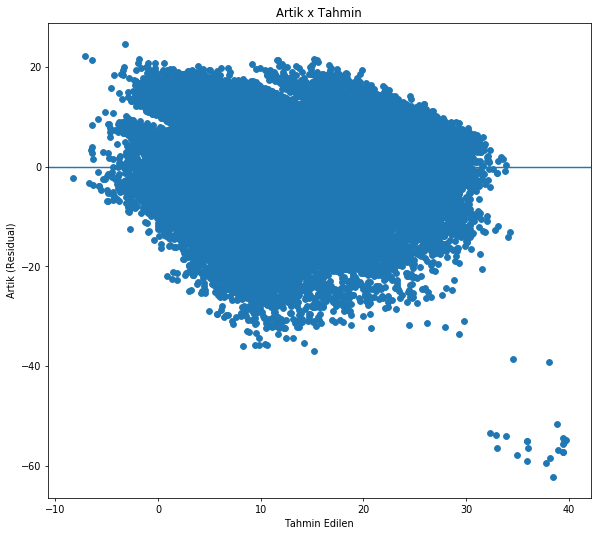

In [14]:
#Homoscedasticity

plt.figure(figsize=(10,9), dpi=70)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Artik (Residual)')
plt.axhline()
plt.title('Artik x Tahmin')
plt.show()

Grafikte hata terimlerinin bir pattern izlemedigini goruyoruz. Modelimizin dogrusal oldugunu soyleyebiliriz.

**Hata Terimi Ortalamada sifir**

In [15]:
tahmin = lrm.predict(X)

In [16]:
X.shape

(96453, 4)

In [17]:
Y.shape

(96453,)

In [18]:
hatalar = Y-tahmin

print(" modelinin ortalama hatası : {:.50f}".format(np.mean(hatalar)))

 modelinin ortalama hatası : 0.00000000000000001896931712421861321620359955118700


Modelin hatalarının ortalaması sıfırdır

In [ ]:
plt.figure(figsize=(10,9), dpi=70)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Artik (Residual)')
plt.axhline()
plt.title('Artik x Tahmin')
plt.show()

Hatalar grafikte serpildigi icin modelimiz dogrusaldir diyebiliriz. 


In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

In [ ]:
bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

In [ ]:
print("Bartlett test değeri : {0:3g} ve p değeri : {1:.50f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.50f}".format(lev_stats[0], lev_stats[1]))

Her iki testin p değerleri 0.05'ten düşüktür. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

In [ ]:
#Dusuk Coklu Dogrusallik/low multicollineartiy
corrArrayX = X.corr().values

In [ ]:
np.linalg.eig(corrArrayX)

Ilk array satirinda sifira yakin deger bulunmadigi icin multicollinearty'verilerin temiz oldugunu goruyoruz.

In [ ]:
#Hata Terimleri birbirleriyle iliskisiz olmalidir. 


plt.figure(figsize=(10,9))
plt.plot(hatalar) 

In [ ]:
#Hatalar arasındaki korelasyonlara bakmanın bir başka yolu da otokorelasyon fonksiyonunu kullanmaktır. 

from statsmodels.tsa.stattools import acf 

In [ ]:
acf_data = acf(hatalar)

In [ ]:
plt.plot(acf_data[1:])

Hata terimleri arasindaki otokorelasyon oldukca yuksektir.

In [ ]:
#Ozellikler hatalarla iliskilendirilmemelidir.


rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken")
plt.ylabel("Modelin hataları")
plt.title("QQ plotu")

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar")
plt.title("Hataların histogramı")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [ ]:
jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Her iki test de hatalarimizin normal dagilmadigini gosterir. 